In [1]:
import pandas as pd
import numpy as np
from math import *
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats

import sys
sys.path.append('../')
import tools

In [2]:
def boxplot(column1, column2='ces', ylim=None):
    tmp = df[[column1, column2]].dropna()
    low_q = np.percentile(tmp[column2],25)
    high_q = np.percentile(tmp[column2],75)
    low = tmp[tmp[column2]<low_q]
    high = tmp[tmp[column2]>high_q]
    plt.boxplot([low[column1].dropna(),high[column1].dropna()])
    if ylim:
        plt.ylim(ylim)
    plt.title(str(column1)+' for low and high '+column2+' tumors')
    print('Pvalue of t-test on high and low: ', scipy.stats.mannwhitneyu(low[column1], high[column1]))
    plt.show()

In [3]:
cancers = ['lung_adeno', 'head_neck_SCC','colorectal']
cancer = cancers[2]

In [4]:
df1 = tools.load_aggr('../data/'+cancer+'/ces.txt', column='ces')
df2 = tools.load_mutation('../data/'+cancer+'/mutation.txt')
df3 = tools.load_data('../data/'+cancer+'/mmr_expr.txt', cat='expr')
df4 = tools.load_data('../data/'+cancer+'/mmr_mut.txt', cat='mut')

In [5]:
df = df2.merge(df1, how='outer', left_on='Sample ID', right_index=True)
df = df.merge(df3, how='outer', left_on='Sample ID', right_index=True)
df = df.merge(df4, how='outer', left_on='Sample ID', right_index=True)
df = df.set_index('Sample ID')
df.head()

,Mutation Count,CNA,ces,MLH1_expr,MLH3_expr,MSH2_expr,MSH3_expr,MSH6_expr,PCNA_expr,PMS2_expr,RFC1_expr,MLH1_mut,MLH3_mut,MSH2_mut,MSH3_mut,MSH6_mut,PCNA_mut,PMS2_mut,RFC1_mut
Sample ID,,,,,,,,,,,,,,,,,,,
TCGA-A6-2675-01,NaN,0.220794,2249.65,-0.303,-0.3813,-1.1213,-0.8592,-0.9114,-0.8893,0.2397,-0.3091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-A6-5667-01,NaN,0.546520,4956.45,0.0734,-0.7571,1.1939,0.357,1.2626,-0.8686,1.4685,-0.5663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-AA-3655-01,NaN,0.139335,6215.71,0.3307,0.3821,1.1313,-0.3836,0.9487,0.1601,2.6567,-0.2761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-AA-3660-01,NaN,0.338368,6201.61,-0.84,0.7112,0.3066,-1.1399,0.0747,0.3335,1.7457,0.0765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-AA-3662-01,NaN,0.441361,5130.71,-0.8401,-0.0688,-0.2476,0.2337,-0.6881,0.2878,0.4853,-0.9949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = tools.get_mmr_status(df, genes_full=['MLH1','MSH2'], threshs=[0.1,0], genes_part=['MLH3'])
df.head()

,Mutation Count,CNA,ces,MLH1_expr,MLH3_expr,MSH2_expr,MSH3_expr,MSH6_expr,PCNA_expr,PMS2_expr,...,MLH1_mut,MLH3_mut,MSH2_mut,MSH3_mut,MSH6_mut,PCNA_mut,PMS2_mut,RFC1_mut,mmr_status,mmr_deficiency
Sample ID,,,,,,,,,,,,,,,,,,,,,
TCGA-A6-2675-01,NaN,0.220794,2249.65,-0.303,-0.3813,-1.1213,-0.8592,-0.9114,-0.8893,0.2397,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,"[MLH1, MSH2]"
TCGA-A6-5667-01,NaN,0.546520,4956.45,0.0734,-0.7571,1.1939,0.357,1.2626,-0.8686,1.4685,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,[MLH1]
TCGA-AA-3655-01,NaN,0.139335,6215.71,0.3307,0.3821,1.1313,-0.3836,0.9487,0.1601,2.6567,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,[]
TCGA-AA-3660-01,NaN,0.338368,6201.61,-0.84,0.7112,0.3066,-1.1399,0.0747,0.3335,1.7457,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,[MLH1]
TCGA-AA-3662-01,NaN,0.441361,5130.71,-0.8401,-0.0688,-0.2476,0.2337,-0.6881,0.2878,0.4853,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,"[MLH1, MSH2]"


Number of samples:  222
Pvalue of t-test: MannwhitneyuResult(statistic=513.0, pvalue=2.5411303439835705e-05)


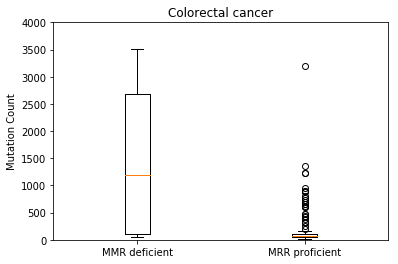

In [10]:
column1 = 'Mutation Count'
column2 = 'mmr_status'

tmp = df[[column1, column2]].dropna()
print('Number of samples: ',len(tmp))
low = tmp[tmp[column2]>0.5]
high = tmp[tmp[column2]<0.5]
plt.boxplot([low[column1].dropna(),high[column1].dropna()], labels=['MMR deficient', 'MRR proficient'])
plt.ylim(0,4000)
plt.ylabel('Mutation Count')
# plt.xlabel('MMR deficiency')
plt.title('Colorectal cancer')
print('Pvalue of t-test:', scipy.stats.mannwhitneyu(low[column1], high[column1]))
plt.show()

Number of samples:  382
Pvalue of t-test: MannwhitneyuResult(statistic=8850.0, pvalue=8.7592751931143551e-11)


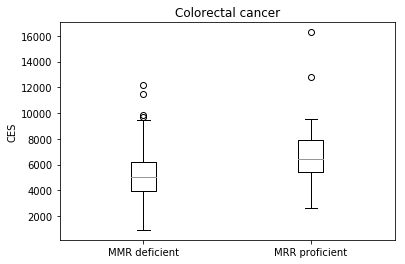

In [12]:
column1 = 'ces'
column2 = 'mmr_status'

tmp = df[[column1, column2]].dropna()
print('Number of samples: ',len(tmp))
low = tmp[tmp[column2]>0.5]
high = tmp[tmp[column2]<0.5]
plt.boxplot([low[column1].dropna(),high[column1].dropna()], labels=['MMR deficient', 'MRR proficient'])
# plt.ylim(0,4000)
plt.title('Colorectal cancer')
plt.ylabel('CES')
# plt.xlabel('MMR deficiency')
print('Pvalue of t-test:', scipy.stats.mannwhitneyu(low[column1], high[column1]))
plt.show()

In [29]:
column1 = 'mmr_status'
column2 = 'ces'

tmp = df[[column1, column2]].dropna()
print('Number of samples: ',len(tmp))
low = tmp[tmp[column2]<np.percentile(tmp[column2],25)]
high = tmp[tmp[column2]>np.percentile(tmp[column2],75)]
print(np.mean(low['mmr_status']))
print(np.mean(high['mmr_status']))

Number of samples:  382
0.854166666667
0.489583333333


Number of samples:  7


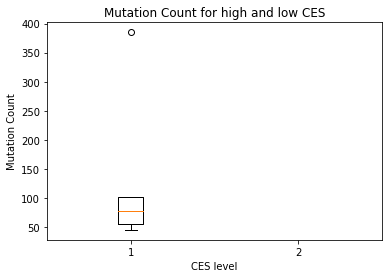

In [37]:
column1 = 'Mutation Count'
column2 = 'ces'

tmp = df[[column1, column2]].dropna()
print('Number of samples: ',len(tmp))
low = tmp[tmp[column2]>.5]
high = tmp[tmp[column2]<0.5]
plt.boxplot([low[column1].dropna(),high[column1].dropna()])
plt.title(str(column1)+' for high and low CES')
plt.ylabel('Mutation Count')
plt.xlabel('CES level')
# print('Pvalue of t-test:', scipy.stats.mannwhitneyu(low[column1], high[column1]))
plt.show()